In [67]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

def getUrls():
    URL = ["https://www.amazon.in/Panasonic-MirAIe/product-reviews/B083J8JKG3/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&sortBy=recent&pageNumber=1"]
    urllist = URL
    return urllist

# function to get the soup object from the input URL
def getsoup(url):
    response = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
    Status_Code = response.status_code
    # print(url)
    # print(Status_Code)
    
    if Status_Code == 200:
      soup = BeautifulSoup(response.content)
    else:
      soup = getsoup(url)
    return soup  

# function to get the last page number of reviews for a particular product
def getLastPageNumber(soup):
    pageNumber = []
    t = soup.find("div", {"data-hook":"cr-filter-info-review-rating-count"}).text.replace("\n","").strip()
    strWithNos=' '.join(t.split())
    rating_review_count=[int(i) for i in strWithNos.split() if i.isdigit()]
    review_number = rating_review_count[1]
    if review_number <=10:
        lastPage = 1
    else:
        lastPage=round(rating_review_count[1]/10)
    return lastPage

# Function to create a list of URLs for all the review pages for a product
def geturllist(url, lastPage):
    urllistPages = []
    if url.endswith('pageNumber=1'):
      url = url[:-1]
    for i in range(1,lastPage+1):
      urllistPages.append (url + str(i))
    return urllistPages


##Defining a function to extract all the required elements from a product review page
#  #extracting the titles of the reviews
def getReviews(soup, url):   
    title_sec = soup.find_all("a","a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold")
    title = []
    for s in title_sec:
      title.append(s.text.replace('\n',''))
        
#  #extracting the author names of the reviews
    author_sec = soup.find_all("a","a-profile")
    author = []
    for r in author_sec:
      author.append(r.text)

#  #extracting the raw text of the reviews        

    Review_text_sec = soup.find_all("span",'a-size-base review-text review-text-content')
    text = []
    for t in Review_text_sec:
      text.append(t.text.replace('\n', '').lstrip())
    print(text)
    print(len(text))

#  #extracting the rating of the reviews  

    Rating = soup.find_all(attrs={"data-hook": "review-star-rating"})    
    rate = []
    for d in Rating:
      rate.append(d.text)
    # print(rate)

#  #extracting the date of the reviews 

    Date_sec = soup.find_all(attrs={"data-hook": "review-date"})    
    date = []
    for d in Date_sec:
      date.append(d.text) 
    # print(date)
    # print(len(date))

#  #extracting the review was helpful info of the reviews 

    help_sec = soup.find_all(attrs={"data-hook": "review-voting-widget"})    
    help1 = []
    for d in help_sec:
      help1.append(d.text.replace('\n', '').lstrip())
    # print(help1)
    # print(len(help1))
        
    collate_df = pd.DataFrame({'Date':date,
                                        'Review_Title':title,
                                        'Rating':rate,
                                        'Author':author[2:],
                                        'Review_text':text,
                                        'Review_helpful':help1})
    return collate_df

#Sequencing and calling the functions to complete the task

if __name__ == '__main__':
    
    urllist = getUrls()
    df2 = []
    y = 1
    for url in urllist:         
        soup = getsoup(url)
        lastPage = getLastPageNumber(soup)
        urllistPages = geturllist(url, lastPage)
        x = 1
        for url in urllistPages:
            soup = getsoup(url)
            df1 = getReviews(soup, url)  
            print("df1",df1)                  
            if x == 1:
                df3 = []
                df3 = df1
            else:                        
                df2 = df3
                print("type",type(df2))
                result = df2.append(df1, ignore_index=True)
                df3 = result
            x += 1
        df3.to_csv ("Amazon_reviews" + str(y) + ".csv")
        print(df3)
        y += 1


['The skill works well for the following:AC turn on/offincrease templower speedAC timerBut it should also support the following commands:set to auto modeStart/stop air swingCan we please have the updates for the above?', "If you aren't able to find Panasonic Miraie skill on Alexa App (it's because your account is set to shop on Amazon.com instead of Amazon.in):- Login to your Amazon Account and from profile, click 'Your Account'- Under Digital Content & Devices - Click 'Content & Devices'- Go to 'Preferences' and click 'Country/Region Settings'- You will see this text: You are currently linked to shop on Amazon.com. Click here to learn more about other Amazon sites you are eligible to shop, based on your country/region of residence.- Upon clicking 'here', you'll see the below text about transferring your amazon account- Learn about transferring your Amazon digital account to Amazon.in- Click 'learn' to transfer your account to Amazon.in- Now go to Alexa App, you should be able to find 

In [68]:
df3.head()

,Date,Review_Title,Rating,Author,Review_text,Review_helpful
0,Reviewed in India on 7 September 2021,Auto mode doesn't support for Alexa,3.0 out of 5 stars,Akash,The skill works well for the following:AC turn...,Helpful
1,Reviewed in India on 3 September 2021,Resolved - Miraie Skill on Alexa App,5.0 out of 5 stars,praneeth,If you aren't able to find Panasonic Miraie sk...,Helpful
2,Reviewed in India on 31 July 2021,not able to connect,1.0 out of 5 stars,Anupam Kamila,not able to connect,One person found this helpful Helpful
3,Reviewed in India on 17 July 2021,unable to turn on or off my panasonic smart ac,1.0 out of 5 stars,Shivansh,MiAie faces multiple problems.a) it wont be sh...,3 people found this helpful Helpful
4,Reviewed in India on 30 June 2021,No Alexa skill for Miraie,1.0 out of 5 stars,Paljinder Pal Singh,Miraie skill is not available in Alexa. Search...,One person found this helpful Helpful


In [69]:
## Exploratory Data Analysis
df3.Rating.value_counts()

1.0 out of 5 stars    17
5.0 out of 5 stars    13
3.0 out of 5 stars     7
2.0 out of 5 stars     2
4.0 out of 5 stars     1
Name: Rating, dtype: int64

In [70]:
## Replacing the text in the column 'Ratings' to required ratings integer values.
rating_dic={"5.0 out of 5 stars": 5,
                     "4.0 out of 5 stars": 4,
                     "3.0 out of 5 stars": 3,
                     "2.0 out of 5 stars": 2,
                     "1.0 out of 5 stars": 1}
rating_dic                    
#df3["Rating"].value_counts()
df3.Rating = [rating_dic[item] for item in df3.Rating]

In [71]:
## Summarizing the data we have
print("Summary statistics of numerical features : \n", df3.describe())
print("\nTotal number of reviews: ",len(df3))
print("\nPercentage of reviews with neutral sentiment : {:.2f}%".format(df3[df3['Rating']==3]["Review_text"].count()/len(df3)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%".format(df3[df3['Rating']>3]["Review_text"].count()/len(df3)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%".format(df3[df3['Rating']<3]["Review_text"].count()/len(df3)*100))

Summary statistics of numerical features : 
           Rating
count  40.000000
mean    2.775000
std     1.761228
min     1.000000
25%     1.000000
50%     3.000000
75%     5.000000
max     5.000000

Total number of reviews:  40

Percentage of reviews with neutral sentiment : 17.50%

Percentage of reviews with positive sentiment : 35.00%

Percentage of reviews with negative sentiment : 47.50%


Text(0, 0.5, 'Count')

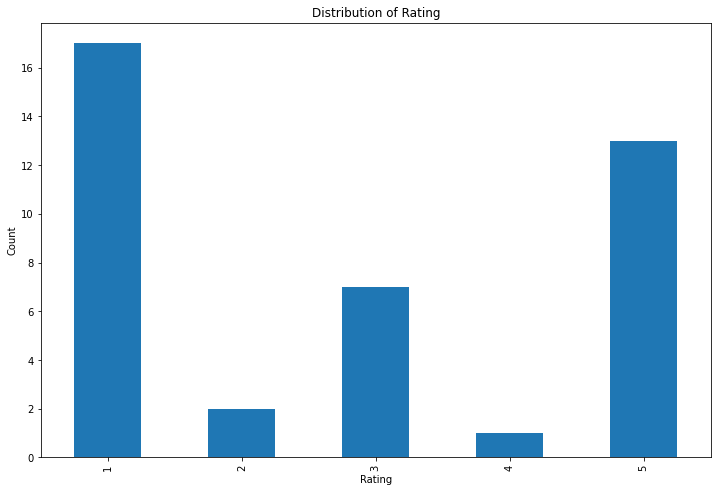

In [72]:
# Plotting distribution of rating
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df3['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

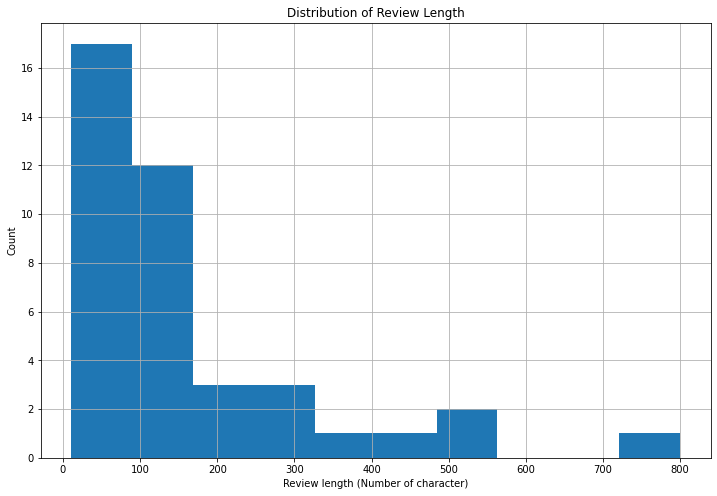

In [74]:
# Plotting distribution of review length
review_length = df3["Review_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [75]:
import numpy as np
# Dropping missing values
df3.dropna(inplace=True)

# Considering reviews with positive sentiment (rating = 4, 5) and negative sentiment (rating = 1, 2)
# and dropping reviews with neutral sentiment (rating 3).
df3 = df3[df3['Rating'] != 3]

# Encoding 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df3['Sentiment'] = np.where(df3['Rating'] > 3, 1, 0)
df3.head()
print(df3)

                                      Date  ... Sentiment
1    Reviewed in India on 3 September 2021  ...         1
2        Reviewed in India on 31 July 2021  ...         0
3        Reviewed in India on 17 July 2021  ...         0
4        Reviewed in India on 30 June 2021  ...         0
5         Reviewed in India on 14 May 2021  ...         0
8          Reviewed in India on 1 May 2021  ...         0
9       Reviewed in India on 23 April 2021  ...         0
10      Reviewed in India on 21 April 2021  ...         1
12      Reviewed in India on 14 April 2021  ...         1
14       Reviewed in India on 6 April 2021  ...         0
15       Reviewed in India on 5 April 2021  ...         0
17      Reviewed in India on 24 March 2021  ...         1
18       Reviewed in India on 5 March 2021  ...         1
19       Reviewed in India on 4 March 2021  ...         1
20   Reviewed in India on 24 February 2021  ...         0
21    Reviewed in India on 8 February 2021  ...         0
22     Reviewe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [76]:
# Spliting data into training set and validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
import re

X_train, X_test, y_train, y_test = train_test_split(df3['Review_text'], df3['Sentiment'], test_size=0.3, random_state=0)

print('Loading %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))


Loading 23 training examples and 10 validation examples. 



In [77]:
# Creating a function to do text preprocessing
import nltk
nltk.download('stopwords')

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    
    #removing html
    text = BeautifulSoup(raw_text, 'lxml').get_text() 
    
    # Removing non-character
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # converting to lower case
    words = letters_only.lower().split()  
    
    # Removing stopword
    if remove_stopwords: 
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    
    # Stemming
    if stemming==True: 
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        print(words)

    # Spliting text    
    if split_text==True:  
        return (words)
    
    return( " ".join(words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# Preprocessing text data in training set and validation set

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Showing a cleaned review in the training set : \n\n',  X_train_cleaned[1])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Showing a cleaned review in the training set : 

 not showing on alexa now i really like panasonic brand but i think its time to move on they arentvreafy for iotpoor implementation


In [79]:
# Splitting  review text into parsed sentences uisng NLTK's punkt tokenizer
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from keras.layers.embeddings import Embedding

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    #Parse text into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[5])

23 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['great', 'skill', 'works', 'perfectly', 'fine']


In [80]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300                    
min_word_count = 5                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context")

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word))
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 24 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['to', 'alexa', 'skill', 'the', 'amazon', 'on', 'in', 'and', 'not', 'i']


In [81]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
   
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [82]:
# Getting feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Getting feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 23 feature vectors with 300 dimensions
Validation set : 10 feature vectors with 300 dimensions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [83]:
# Defining a function check the Model Evalutaion Metrices
def modelEvaluation(predictions):
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [84]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)
print(df3)


Accuracy on validation set: 0.8000

AUC score : 0.7500

Classification report : 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10


Confusion Matrix : 
 [[6 0]
 [2 2]]
                                      Date  ... Sentiment
1    Reviewed in India on 3 September 2021  ...         1
2        Reviewed in India on 31 July 2021  ...         0
3        Reviewed in India on 17 July 2021  ...         0
4        Reviewed in India on 30 June 2021  ...         0
5         Reviewed in India on 14 May 2021  ...         0
8          Reviewed in India on 1 May 2021  ...         0
9       Reviewed in India on 23 April 2021  ...         0
10      Reviewed in India on 21 April 2021  ...         1
12      Reviewed in India on 14

In [85]:
#word cloud for the sentiments
from wordcloud import WordCloud
def create_word_cloud(df3,sentiment):
    try: 
        #df_brand = df.loc[df['Brand'].isin([brand])]
        #df_brand_sample = df_brand.sample(frac=0.1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df3[df3["Sentiment"]==1]["Review_text"]
        if sentiment == 0:
            df_reviews = df3[df3["Sentiment"]==0]["Review_text"]
            
        for val in df_reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass

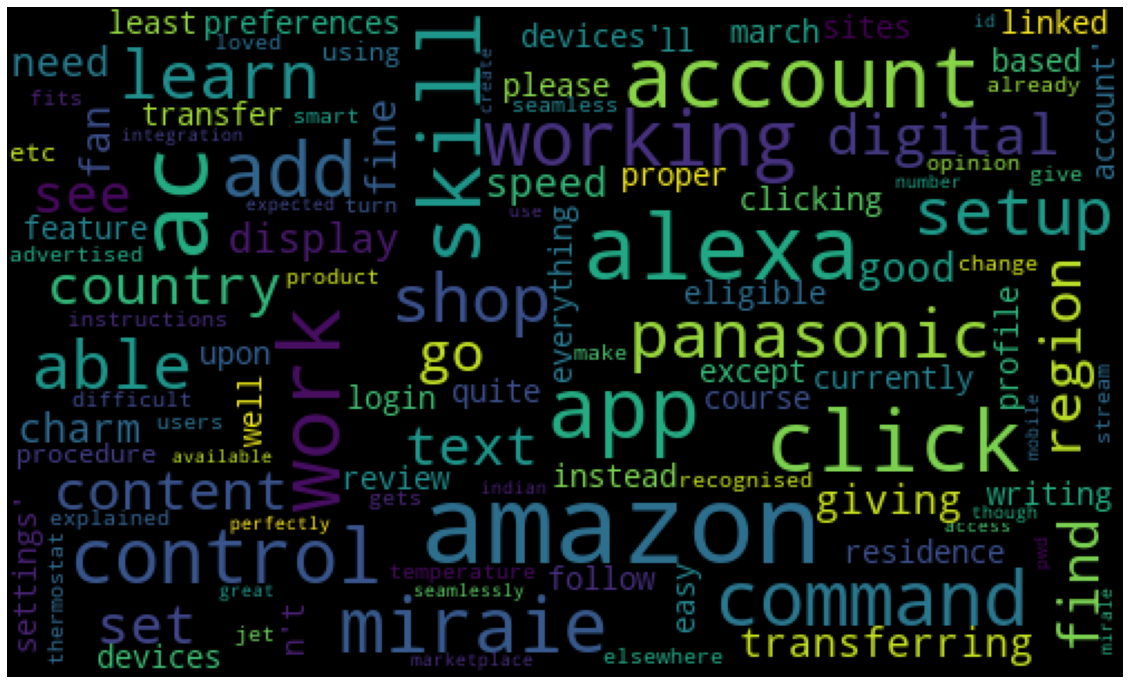

In [86]:
create_word_cloud(df3,sentiment=1)

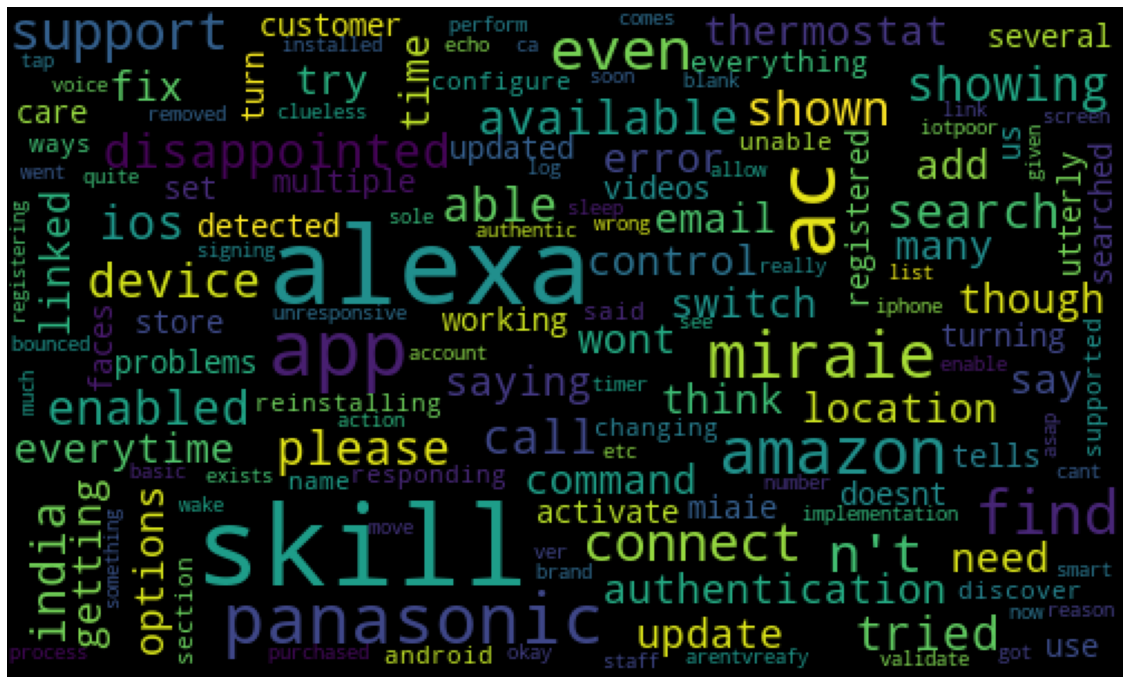

In [87]:
create_word_cloud(df3,sentiment=0)